In [1]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
os.getcwd()

'C:\\Users\\prani\\Downloads'

In [2]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__) # requires version >= 1.9.0

2.4.1


In [3]:
import cufflinks as cf

In [4]:
# For Notebooks
init_notebook_mode(connected=True)

In [5]:
# For offline use
cf.go_offline()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [6]:
churn = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [7]:
churn.shape

(7043, 21)

In [8]:
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
churn['SeniorCitizen']=pd.Categorical(churn['SeniorCitizen'])
churn.dtypes

customerID            object
gender                object
SeniorCitizen       category
Partner               object
Dependents            object
tenure                 int64
PhoneService          object
MultipleLines         object
InternetService       object
OnlineSecurity        object
OnlineBackup          object
DeviceProtection      object
TechSupport           object
StreamingTV           object
StreamingMovies       object
Contract              object
PaperlessBilling      object
PaymentMethod         object
MonthlyCharges       float64
TotalCharges          object
Churn                 object
dtype: object

In [10]:
churn=churn[churn['TotalCharges']!=" "]
churn['TotalCharges']=pd.to_numeric(churn['TotalCharges'])
churn.shape

(7032, 21)

In [11]:
del churn["customerID"]

deleted the custumerID since it doesn’t help to predict if the client is going to leave

# Exploratory Data Analysis
## Missing Data

In [12]:
churn.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

data is almost complete so will just drop the few NA rows data has null values

In [15]:
churn=  churn.dropna()

In [76]:
numerics = ['float64', 'int64']
numeric_ds = churn.select_dtypes(include=numerics)
objects_dataset = churn.select_dtypes(exclude=numerics)

In [75]:
numeric_ds.describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [60]:
objects_dataset.describe().T

,count,unique,top,freq
gender,7032,2,Male,3549
SeniorCitizen,7032,2,0,5890
Partner,7032,2,No,3639
Dependents,7032,2,No,4933
PhoneService,7032,2,Yes,6352
MultipleLines,7032,3,No,3385
InternetService,7032,3,Fiber optic,3096
OnlineSecurity,7032,3,No,3497
OnlineBackup,7032,3,No,3087
DeviceProtection,7032,3,No,3094


In [19]:
churn.groupby('Churn').size()

Churn
No     5163
Yes    1869
dtype: int64

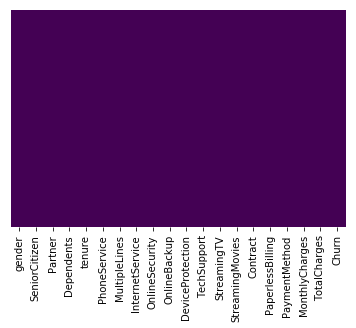

In [77]:
sns.heatmap(churn.isnull(),yticklabels=False,cbar=False,cmap='viridis')

no missing data

[]

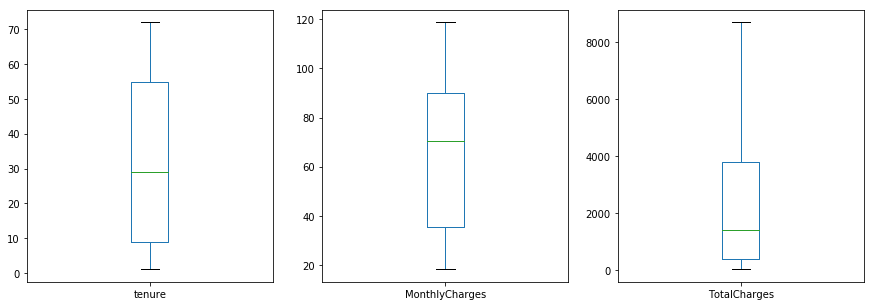

In [78]:
numeric_ds.plot(kind='box',subplots=True, figsize=(15,5))
plt.plot()

[]

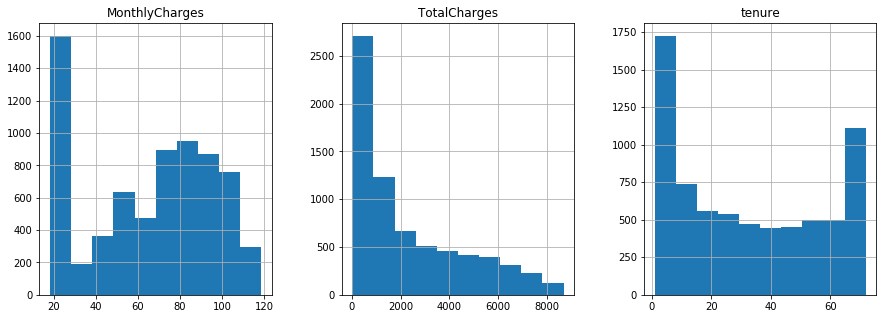

In [79]:
numeric_ds.hist(layout=(1,3), figsize=(15,5))
plt.plot()

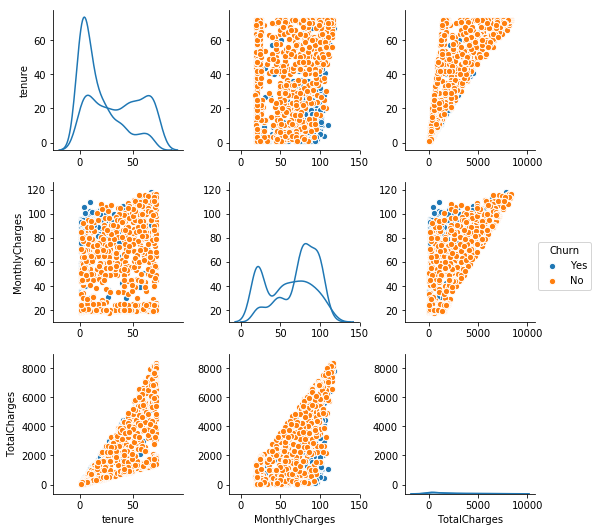

In [80]:
numeric_ds = pd.concat([numeric_ds,churn["Churn"]],axis=1) #Add the 'Churn' variable to the numeric churn

graph = sns.PairGrid(numeric_ds.sample(n=1000), hue="Churn")
graph = graph.map_offdiag(plt.scatter, linewidths=1, edgecolor="w", s=40)
graph = graph.map_diag(sns.kdeplot)
graph = graph.add_legend()

C:\Users\prani\Anaconda3\lib\site-packages\seaborn\categorical.py:598: FutureWarning:

remove_na is deprecated and is a private function. Do not use.

C:\Users\prani\Anaconda3\lib\site-packages\seaborn\categorical.py:826: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



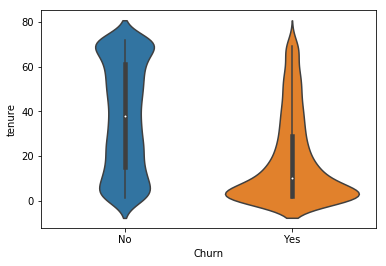

In [81]:
sns.violinplot(x="Churn", y="tenure", data=numeric_ds);

C:\Users\prani\Anaconda3\lib\site-packages\seaborn\categorical.py:1508: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



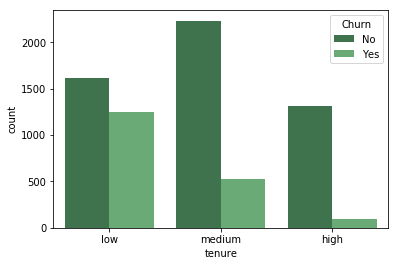

In [82]:
tenure_bins=pd.cut(numeric_ds["tenure"], bins=[0,20,60,80], labels=['low','medium','high'])
sns.countplot(x=tenure_bins, hue="Churn", data=numeric_ds, palette="Greens_d");

C:\Users\prani\Anaconda3\lib\site-packages\seaborn\categorical.py:598: FutureWarning:

remove_na is deprecated and is a private function. Do not use.

C:\Users\prani\Anaconda3\lib\site-packages\seaborn\categorical.py:826: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



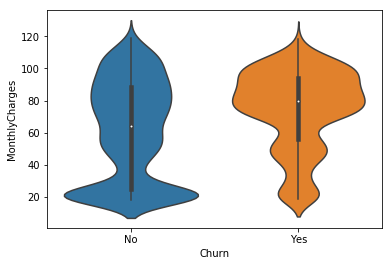

In [83]:
sns.violinplot(x="Churn", y="MonthlyCharges", data=numeric_ds);

C:\Users\prani\Anaconda3\lib\site-packages\seaborn\categorical.py:1508: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



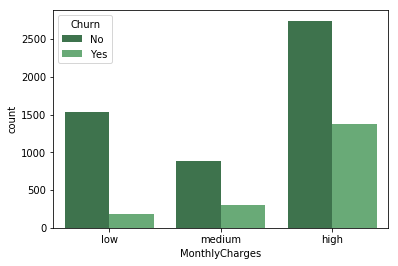

In [85]:
MCharges_bins=pd.cut(numeric_ds["MonthlyCharges"], bins=[0,35,60,130], labels=['low','medium','high'])
sns.countplot(x=MCharges_bins, hue="Churn", data=numeric_ds, palette="Greens_d");

C:\Users\prani\Anaconda3\lib\site-packages\seaborn\categorical.py:598: FutureWarning:

remove_na is deprecated and is a private function. Do not use.

C:\Users\prani\Anaconda3\lib\site-packages\seaborn\categorical.py:826: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



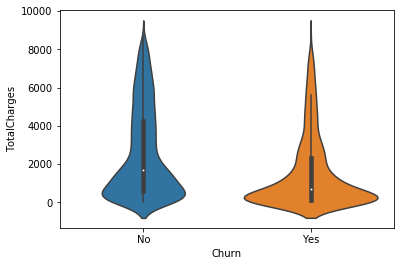

In [86]:
    sns.violinplot(x="Churn", y="TotalCharges", data=numeric_ds);

C:\Users\prani\Anaconda3\lib\site-packages\seaborn\categorical.py:1508: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



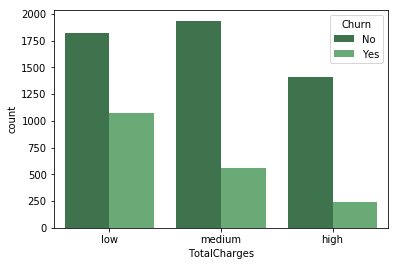

In [87]:
TCharges_bins=pd.cut(numeric_ds["TotalCharges"], bins=[0,1000,4000,10000], labels=['low','medium','high'])
sns.countplot(x=TCharges_bins, hue="Churn", data=numeric_ds, palette="Greens_d");

# Numeric against categorical plots

C:\Users\prani\Anaconda3\lib\site-packages\seaborn\categorical.py:598: FutureWarning:

remove_na is deprecated and is a private function. Do not use.

C:\Users\prani\Anaconda3\lib\site-packages\seaborn\categorical.py:826: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



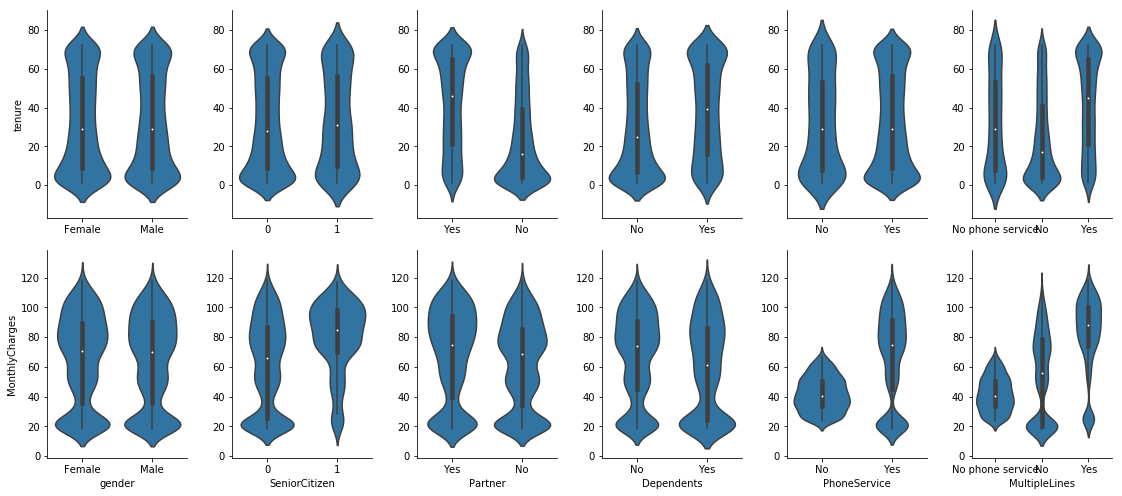

In [89]:
graph2 = sns.PairGrid(churn, x_vars=objects_ds.columns[0:6].values,
    y_vars=numeric_ds.columns[0:2].values, aspect=.75, size=3.5)
graph2.map(sns.violinplot)

C:\Users\prani\Anaconda3\lib\site-packages\seaborn\categorical.py:598: FutureWarning:

remove_na is deprecated and is a private function. Do not use.

C:\Users\prani\Anaconda3\lib\site-packages\seaborn\categorical.py:826: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



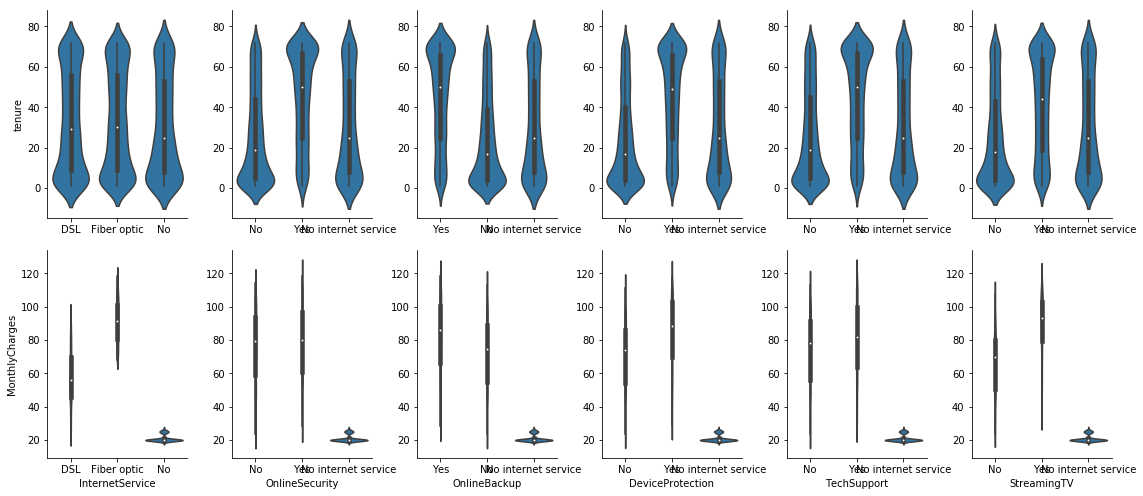

In [91]:
graph3 = sns.PairGrid(churn, x_vars=objects_ds.columns[6:12].values,  
    y_vars=numeric_ds.columns[0:2].values, aspect=.75, size=3.5)
graph3.map(sns.violinplot);

C:\Users\prani\Anaconda3\lib\site-packages\seaborn\categorical.py:598: FutureWarning:

remove_na is deprecated and is a private function. Do not use.

C:\Users\prani\Anaconda3\lib\site-packages\seaborn\categorical.py:826: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



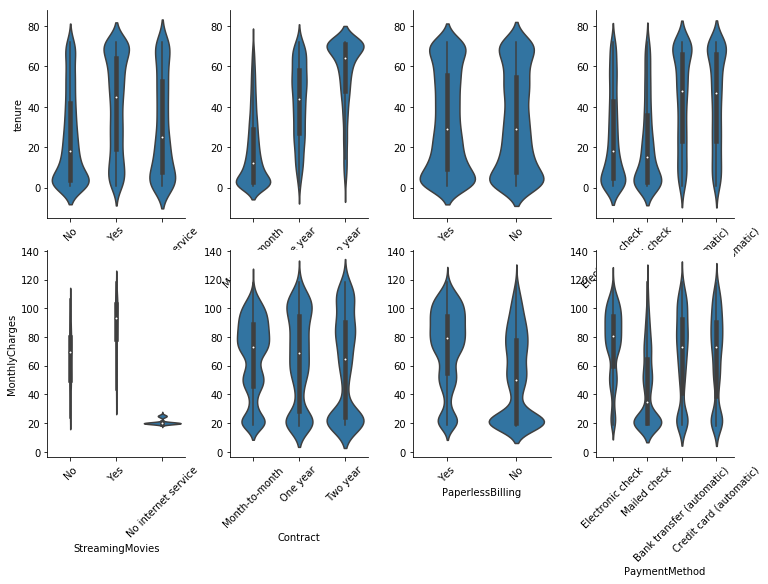

In [92]:
graph4 = sns.PairGrid(churn, x_vars=objects_ds.columns[12:16].values,
    y_vars=numeric_ds.columns[0:2].values, aspect=.75, size=3.5)
for ax in graph4.axes.flat:
   for tick in ax.get_xticklabels():
      tick.set_rotation(45)
graph4.map(sns.violinplot);

# Categorical Plots

C:\Users\prani\Anaconda3\lib\site-packages\seaborn\categorical.py:1508: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



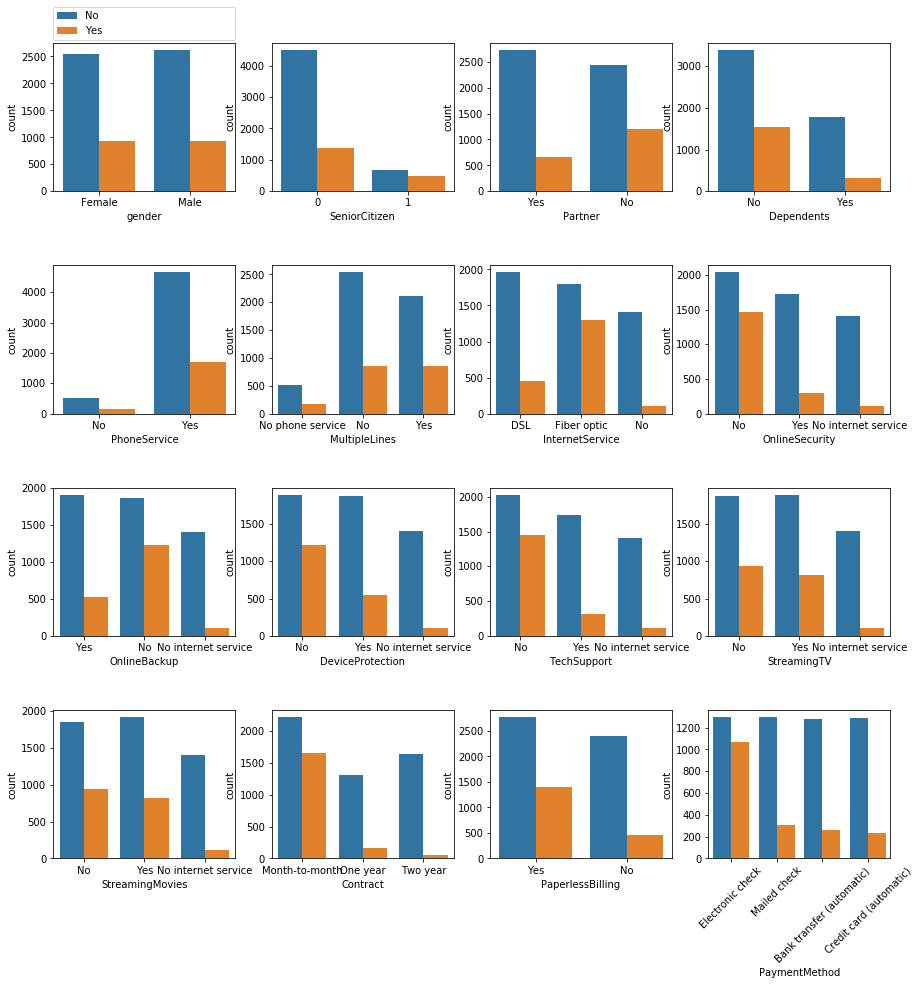

In [93]:
fig,ax =plt.subplots(4,4,figsize=(15,15))
fig.subplots_adjust(hspace=.5)
for i in range(0,16):
    g = sns.countplot(x=objects_ds.iloc[:,i], hue=objects_ds["Churn"], ax=ax[divmod(i,4)])
    g.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, mode="expand", borderaxespad=0.) if i==0 else g.legend_.remove()
for tick in ax[3,3].get_xticklabels():
    tick.set_rotation(45)

In [94]:
    ## Training and Testing Data

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
bins=pd.DataFrame([tenure_bins, MonthlyCharges_bins, TotalCharges_bins]).T

In [97]:
data=pd.concat([bins,objects_ds],axis=1)  # Concatenate bins with object variables
for i in list(data.columns):
    data[i] = pd.Categorical(data[i]) # Convert all the variables into categorical
dummy = pd.get_dummies(data) # Transform the categorical variables into binary vectors

In [98]:

features = dummy.drop(["Churn_Yes", "Churn_No"], axis=1).columns
X = dummy[features].values
Y = dummy["Churn_Yes"].values
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

# Training Models

In [99]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.metrics import classification_report
from IPython.display import display
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
scoring = 'accuracy'
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
results = []
names = []
for name, model in models:
   kfold = KFold(n_splits=10, random_state=seed)
   cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
   results.append(cv_results)
   names.append(name)
   msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
   print(msg)

LR: 0.800179 (0.012824)
KNN: 0.765153 (0.010409)
CART: 0.732978 (0.017156)
NB: 0.701870 (0.015433)


from above it is clear that logistic Regression is the best among other

## Evaluation

In [100]:
from sklearn.metrics import classification_report

In [101]:
# Make predictions on validation churn
model = LogisticRegression()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.794598436389
[[918  99]
 [190 200]]
             precision    recall  f1-score   support

          0       0.83      0.90      0.86      1017
          1       0.67      0.51      0.58       390

avg / total       0.78      0.79      0.79      1407



Ploting a graph to show importance of variables

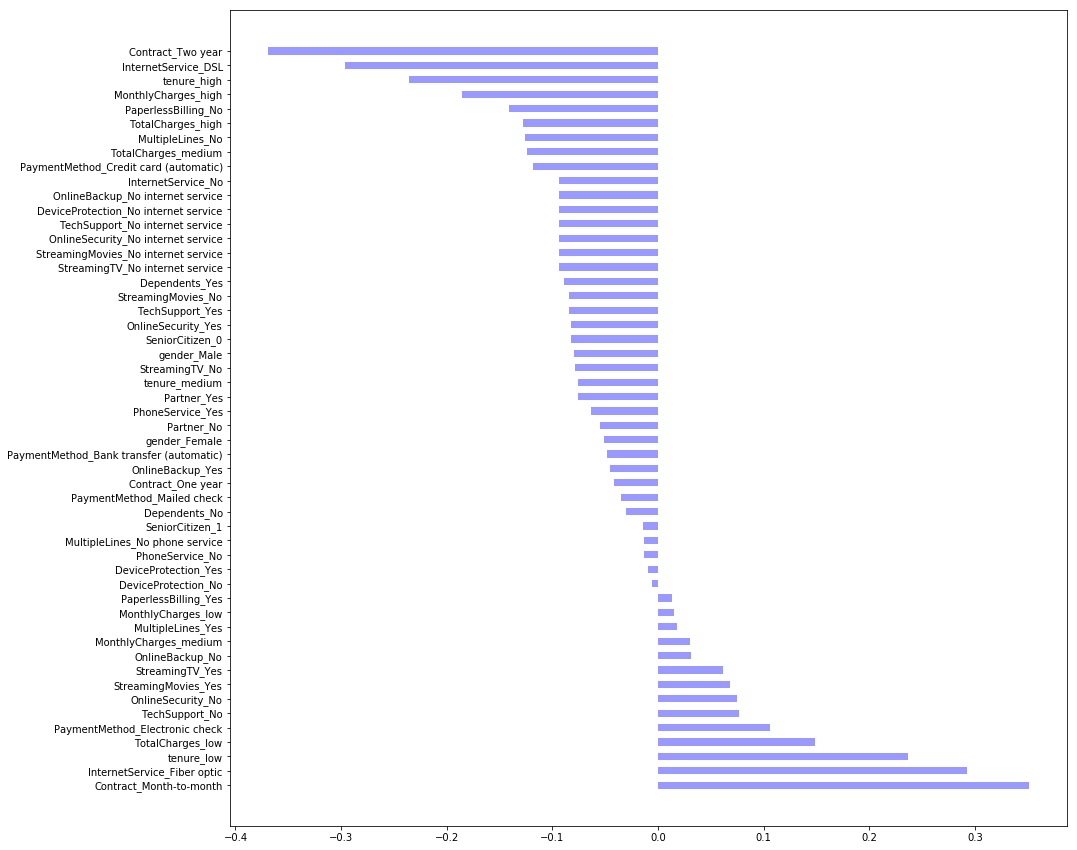

In [102]:
coefs = np.std(X_train, 0)*model.coef_
df_imp = pd.DataFrame(coefs).T
df_imp.columns=["importance"]
df_imp["labels"] = features
df_imp.sort_values("importance", inplace=True, ascending=False)
index = np.arange(len(df_imp))
fig = plt.figure(figsize=(15,15))
bar_width = 0.5
rects = plt.barh(index , df_imp["importance"], bar_width, alpha=0.4, color='b', label='Main')
plt.yticks(index, df_imp["labels"])
plt.show()